# seaborn单维度与关联维度分析

## 单变量分布

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [2]:
import datetime
import matplotlib.dates as mpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import time
from matplotlib import gridspec
from pandas import DataFrame
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 灰度图
最方便快捷的方式~

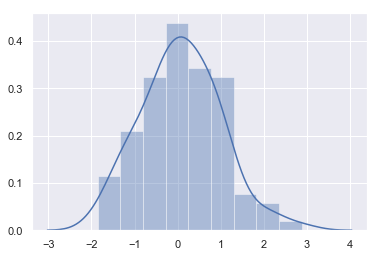

In [3]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True)

想得到更精细的刻画？调节bins~

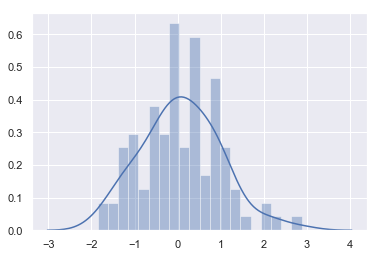

In [4]:
sns.distplot(x, kde=True, bins=20)

想配合着实例一起看？

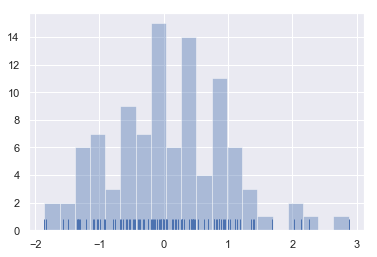

In [5]:
sns.distplot(x, kde=False, bins=20, rug=True)

配合着实例一起看有什么好处？指导你设置合适的bins。

### 核密度估计
通过观测估计概率密度函数的形状。
有什么用呢？待定系数法求概率密度函数~

核密度估计的步骤：
* 每一个观测附近用一个正态分布曲线近似
* 叠加所有观测的正太分布曲线
* 归一化

在seaborn中怎么画呢？

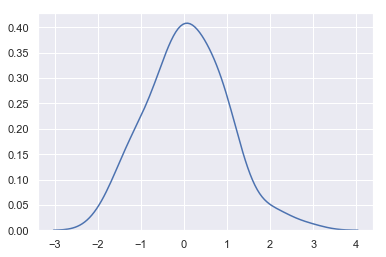

In [7]:
sns.kdeplot(x)

bandwidth的概念：用于近似的正态分布曲线的宽度。

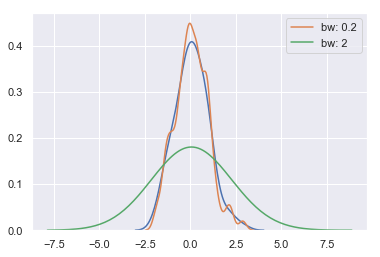

In [8]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

### 模型参数拟合

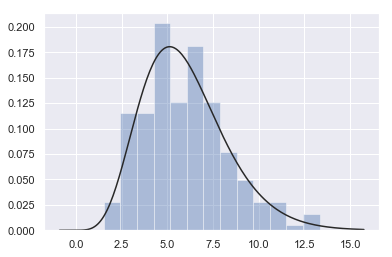

In [9]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

## 双变量分布

In [30]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)

pd.DataFrame(data).head()

,0,1
0,0.509913,0.651914
1,-1.031891,0.792211
2,-0.082073,-0.679644
3,-0.903375,0.055488
4,0.132694,2.894836


[multivariate_normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html?highlight=multivariate_normal#scipy.stats.multivariate_normal)

In [10]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200) #返回指定相关性的多列数据
df = pd.DataFrame(data, columns=["x", "y"])

两个相关的正态分布~
### 散点图

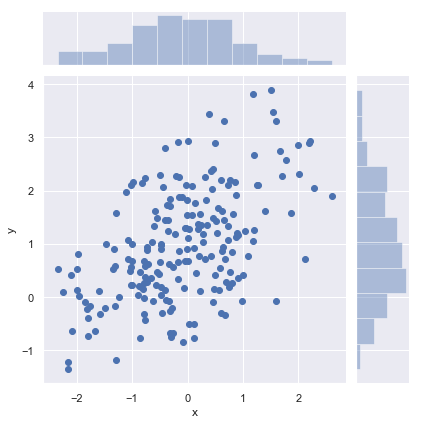

In [11]:
sns.jointplot(x="x", y="y", data=df)

### 六角箱图

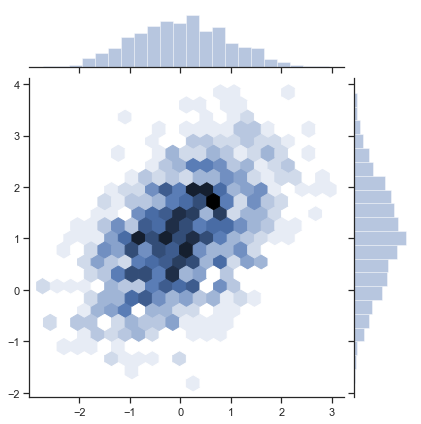

In [12]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")

### 核密度估计

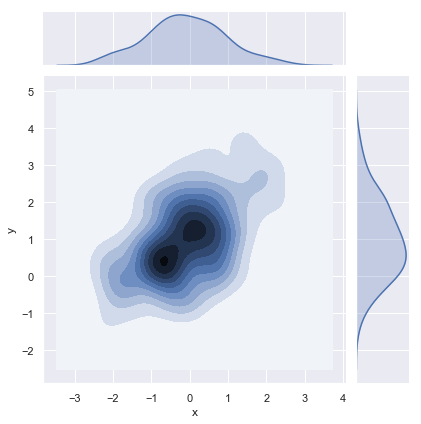

In [13]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

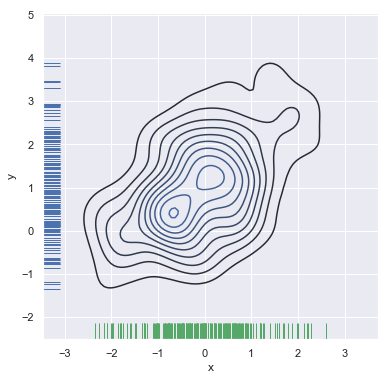

In [14]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

想看到更连续梦幻的效果~

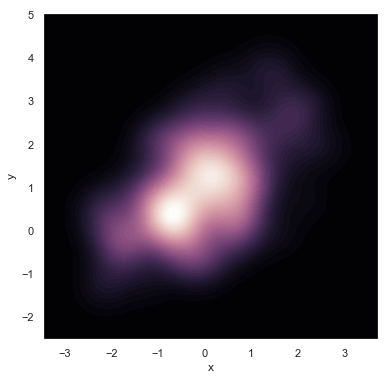

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

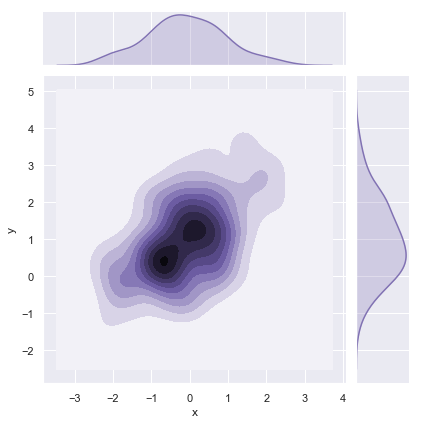

In [16]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
# g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
# g.set_axis_labels("$X$", "$Y$")

## 数据集中的两两关系

In [17]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


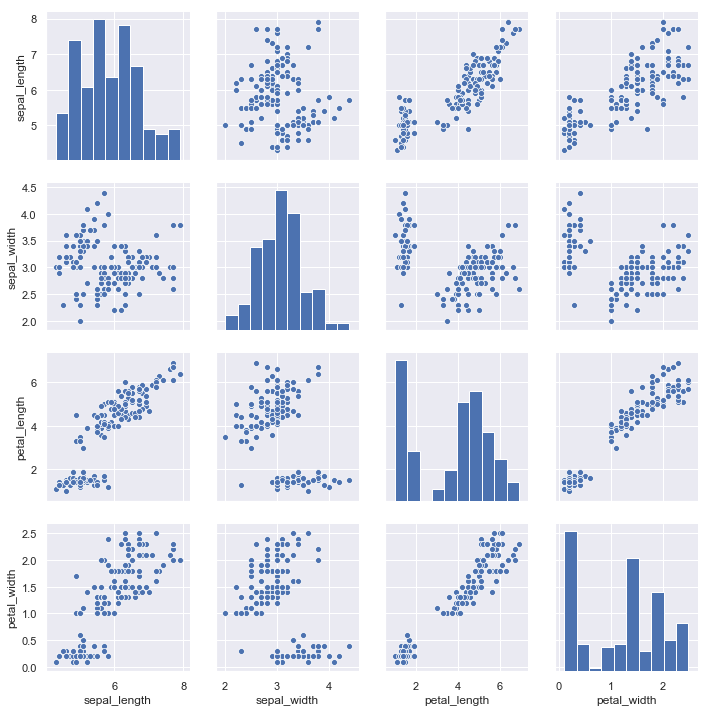

In [18]:
sns.pairplot(iris);

属性两两间的关系 + 属性的灰度图

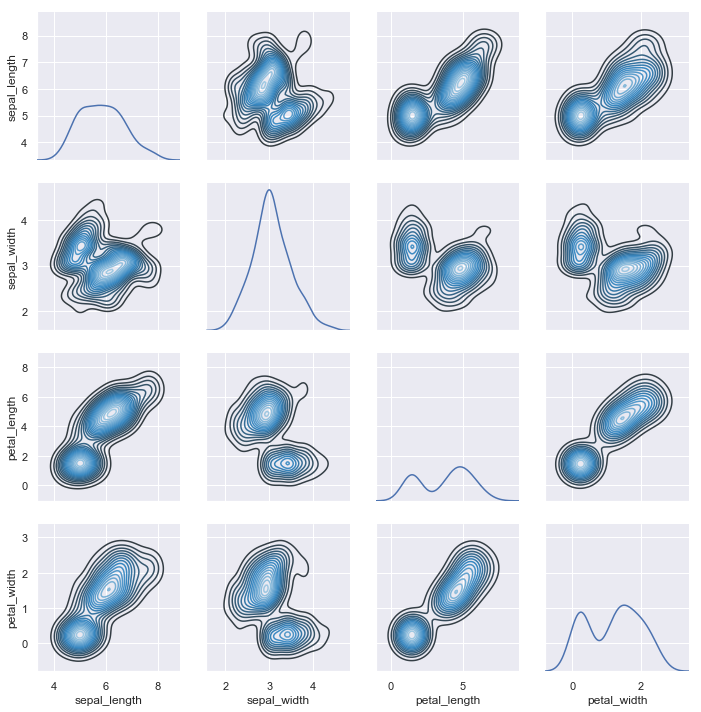

In [19]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot) #对角线绘制方式
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20) #非对角线绘制方式